# Generation Part
Generation of the code

## Statistical Language Modelling

Modelling of the data

### Intro To N-Grams

Probabilistic Language Model
(assigning Probability to a model)

use the concept of **Conditional Probability** and the **Chain rule** in the Probability

For Example
The Chain Rule Applied to Compute Joint Probability of words in sentence

P(w1, w2, w3...wn) = Π P(w1 | w1w2...Wi-1)

#### Markov Assumption
The Markov Assumption in NLP is a simplification that assumes the probability of a future state depends only on the current state, not on the entire sequence of past states.

Example:

In a sentence like "The cat sat on the mat", predicting the next word after "the" can be done by just considering "the" and not the words that came before it. We assume that "the" gives us enough context to predict the next word with reasonable accuracy.

This assumption simplifies modeling and computation in NLP tasks like:

Part-of-Speech Tagging Text Generation Speech Recognition While not always entirely accurate, it often provides good results and makes complex NLP problems more manageable.

In [ ]:
import nltk
from nltk.tag import DefaultTagger

# Sample sentence
sentence = "The cat sat on the mat."

# Tokenize the sentence
tokens = nltk.word_tokenize(sentence)

# Create a simple tagger that tags everything as a noun (NN)
default_tagger = DefaultTagger('NN')

# Tag the sentence using the Markov Assumption (current word only)
tagged_sentence = default_tagger.tag(tokens)

# Print the tagged sentence
print(tagged_sentence)

[('The', 'NN'), ('cat', 'NN'), ('sat', 'NN'), ('on', 'NN'), ('the', 'NN'), ('mat', 'NN'), ('.', 'NN')]


#### N - Grams

N-grams are contiguous sequences of 'n' items from a given text. These items can be words, characters, or even phonemes. In NLP, n-grams are used for various tasks like:


**1. Language Modeling:**

- Predicting the next word in a sentence based on the previous words.
- Estimating the probability of a given sequence of words.

**2. Text Classification:**

- Identifying the topic or sentiment of a text based on the frequency of n-grams.

**3. Machine Translation:**

- Improving translation quality by considering the context of n-grams.

**Types of N-Grams:**

- **Unigram:** Single word (e.g., "cat", "the")
- **Bigram:** Two consecutive words (e.g., "the cat", "sat on")
- **Trigram:** Three consecutive words (e.g., "the cat sat", "sat on the")

**Example:**

For the sentence "The cat sat on the mat.", some n-grams are:

- Unigrams: "The", "cat", "sat", "on", "the", "mat"
- Bigrams: "The cat", "cat sat", "sat on", "on the", "the mat"
- Trigrams: "The cat sat", "cat sat on", "sat on the", "on the mat"

**Challenges and Considerations:**

- **Sparsity:**  As 'n' increases, the number of possible n-grams grows exponentially, leading to sparse data. Smoothing techniques are used to address this.
- **Computational Cost:**  Processing and storing large n-grams can be computationally expensive.

**Conclusion:**

N-grams are a fundamental tool in NLP, providing valuable insights into the structure and patterns of language. They are used in a wide range of applications, contributing to improved language understanding and generation.

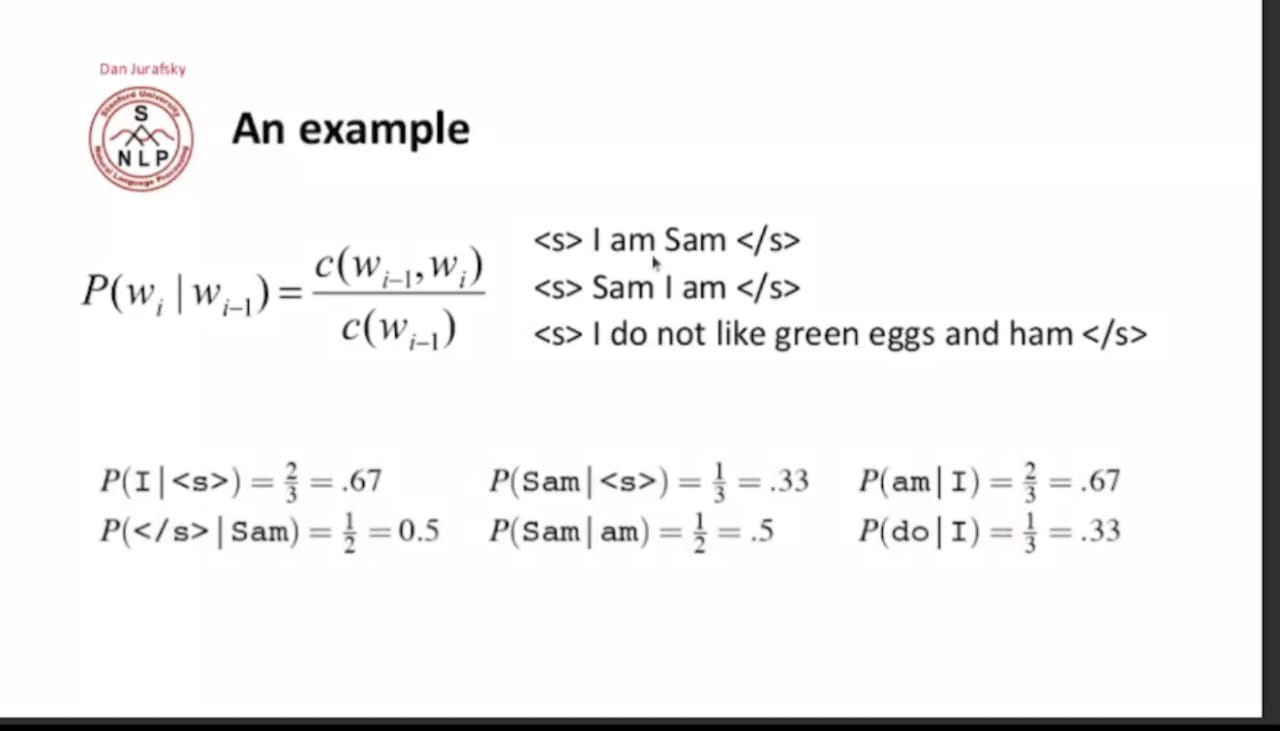






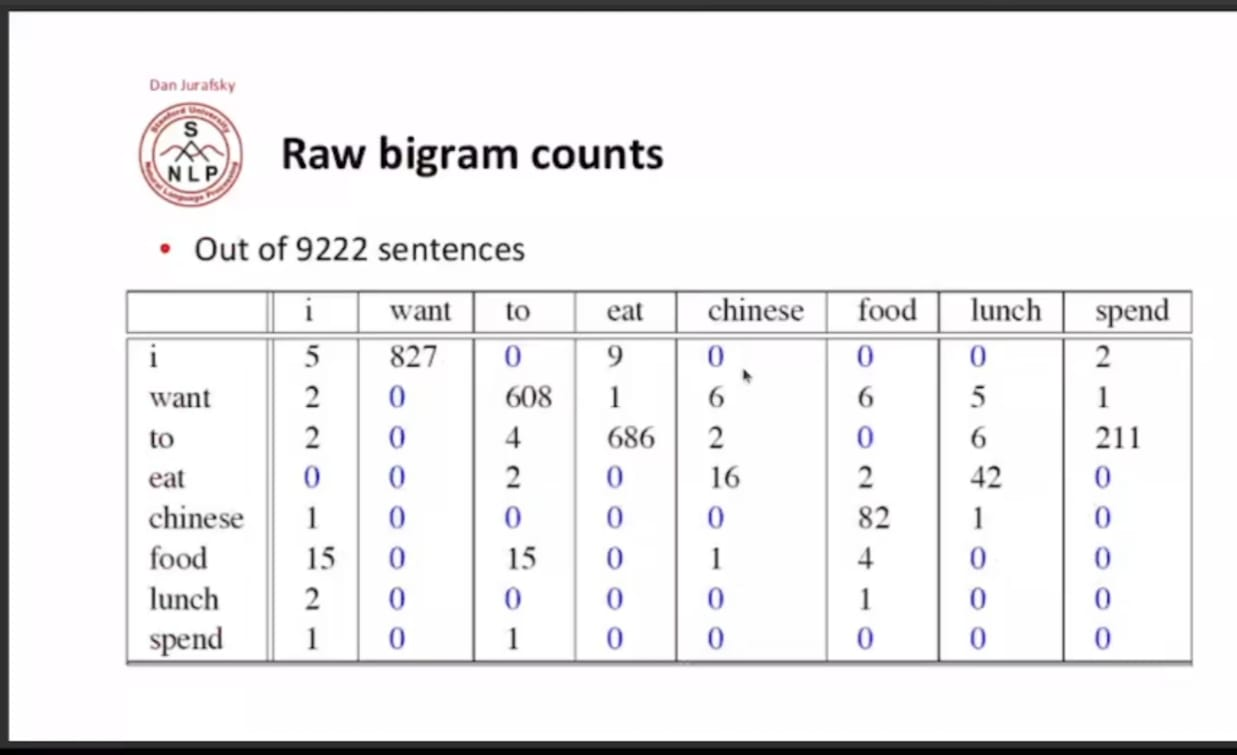

In [ ]:
# prompt: explain the concept of n grams using code

from nltk.util import ngrams
import nltk

# Sample sentence
sentence = "The cat sat on the mat."

# Tokenize the sentence
tokens = nltk.word_tokenize(sentence)

# Generate bigrams
bigrams = list(ngrams(tokens, 2))
print("Bigrams:", bigrams)

# Generate trigrams
trigrams = list(ngrams(tokens, 3))
print("Trigrams:", trigrams)

quadgrams = list(ngrams(tokens, 4));
print("Quadgrams: ", quadgrams)


Bigrams: [('The', 'cat'), ('cat', 'sat'), ('sat', 'on'), ('on', 'the'), ('the', 'mat'), ('mat', '.')]
Trigrams: [('The', 'cat', 'sat'), ('cat', 'sat', 'on'), ('sat', 'on', 'the'), ('on', 'the', 'mat'), ('the', 'mat', '.')]
Quadgrams:  [('The', 'cat', 'sat', 'on'), ('cat', 'sat', 'on', 'the'), ('sat', 'on', 'the', 'mat'), ('on', 'the', 'mat', '.')]


## Smoothing

In the context of NLP generation tasks, smoothing techniques are used to handle cases where the model encounters unseen or rare words (also known as out-of-vocabulary words) during text generation.



Reasoning:

Preventing Zero Probabilities: Without smoothing, the model would assign a zero probability to unseen words, leading to the generation of incomplete or nonsensical sentences.
Improving Robustness: Smoothing helps the model to be more robust to variations in the training data and to generalize better to unseen data.
Common Smoothing Techniques:

Add-k Smoothing (Laplace Smoothing): Adds a small constant (k) to the count of all words, including unseen words.
Good-Turing Smoothing: Redistributes probability mass from seen words to unseen words based on the frequency of words that appear only once in the training data.
Kneser-Ney Smoothing: A more sophisticated technique that considers the context of words when estimating their probabilities.
By applying smoothing, NLP models can generate more fluent and coherent text, even when encountering words or phrases not present in the training data

**Some Smoothing Techniques are**

1.Add one Smoothing or Laplace Smoothing

2.Additive Smoothing

3.Good Turing

4.Kneser-Ney Smoothing

5.Written-Bell Smoothing

### Add-One Smoothing or Laplace Smoothing

Add-one estimation, also known as Laplace smoothing, is a basic smoothing technique used in NLP to address the issue of unseen words or n-grams in a corpus.






Here's how it works:

Count Occurrences: For every n-gram (a sequence of 'n' words) in your training corpus, count how many times it appears.

Add One: To each count, including the count of zero for unseen n-grams, add 1. This ensures that no n-gram has a probability of zero.

Calculate Probabilities: Calculate the probability of each n-gram by dividing its adjusted count (original count + 1) by the total number of n-grams in the corpus plus the size of the vocabulary (V).

P(w_i | w_{i-1}) = (Count(w_{i-1}, w_i) + 1) / (Count(w_{i-1}) + V)



Where:

P(w_i | w_{i-1}) is the probability of word w_i given the preceding word w_{i-1}
Count(w_{i-1}, w_i) is the number of times the bigram (w_{i-1}, w_i) appears in the corpus.
Count(w_{i-1}) is the number of times the word w_{i-1} appears in the corpus.
V is the size of the vocabulary (total number of unique words).



Reasoning:

By adding 1 to every count, you're essentially "stealing" a small amount of probability mass from seen n-grams and redistributing it to unseen n-grams. This prevents the model from assigning zero probability to unseen n-grams, allowing it to generate more complete and meaningful sentences.

Limitations:

Add-one smoothing can be overly simplistic and may not accurately reflect the true probabilities of unseen n-grams.
It tends to overestimate the probability of unseen n-grams, potentially leading to less accurate language models.
Despite its limitations, add-one smoothing is a simple and widely used technique for handling unseen words in NLP tasks.




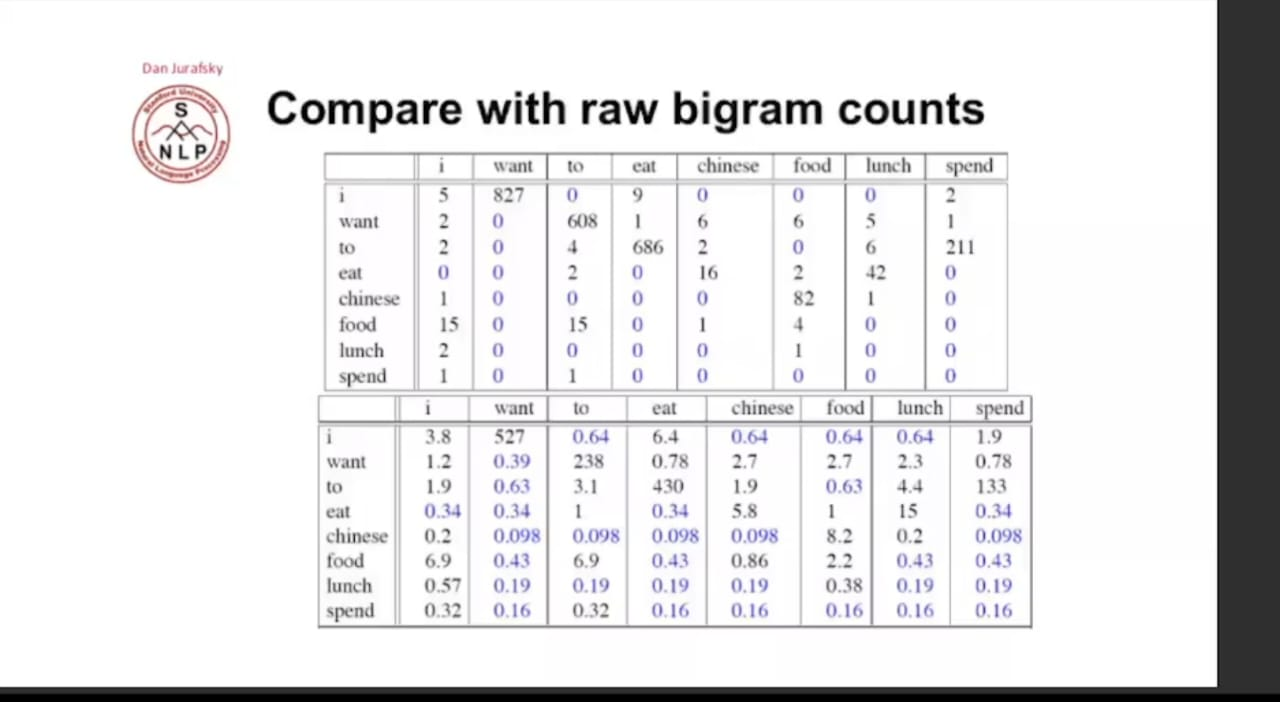

### Additive Smoothing

Additive smoothing, also known as Laplace smoothing, is a technique used in natural language processing to address the issue of zero probabilities for words that don't appear in a training corpus. It works by adding a small constant (usually 1) to the count of each word, including those that haven't been seen before. This prevents zero probabilities, allowing the model to assign a small probability to unseen words, and improves the overall robustness and generalization of the model. The formula for additive smoothing is:

P(word) = (count(word) + alpha) / (total words + alpha * vocabulary size)

Where alpha is the smoothing parameter (usually 1).

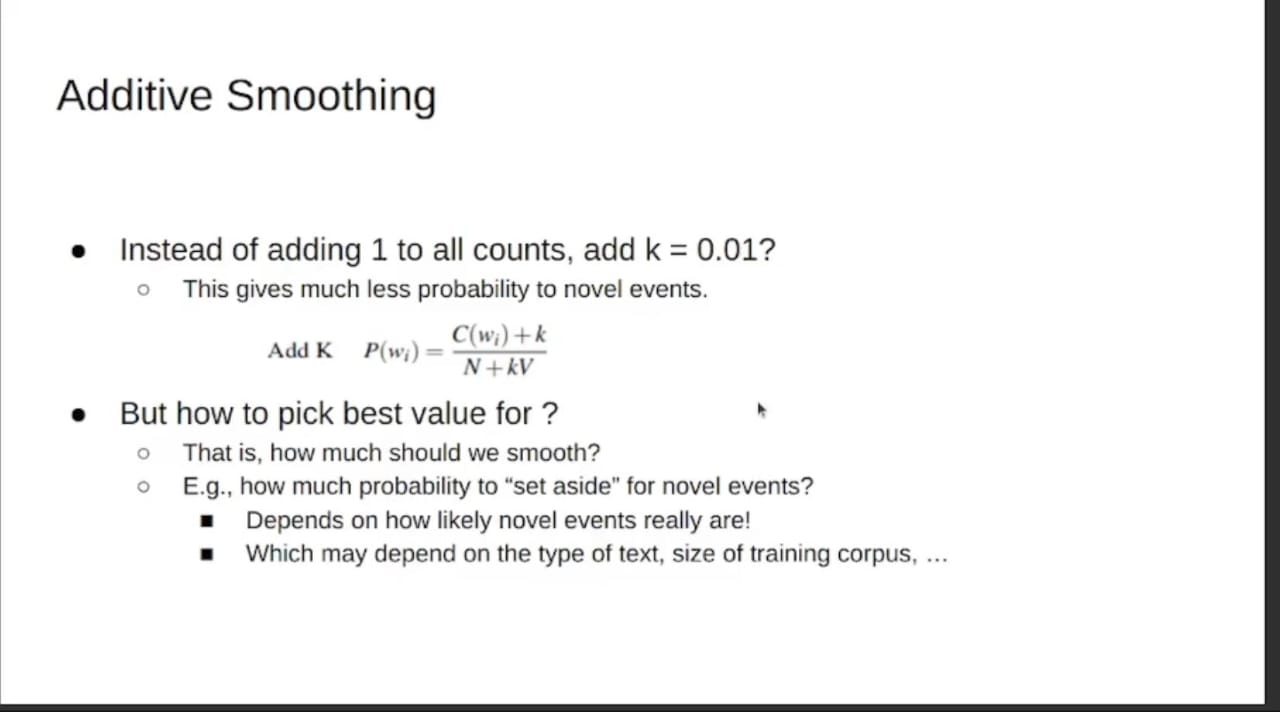

### Good Turing Smoothing

Good Turing smoothing is a discounting technique used to estimate the probability of unseen words in a text corpus. It redistributes probability mass from seen words to unseen words based on the frequency of words occurring only once.

Formula:


P(unseen word) = N1 / N

Where:

N1 is the number of words seen once in the training data.
N is the total number of words in the training data.

Key Idea:
The core idea is that words seen once in the training data provide a good estimate for the probability of words that haven't been seen at all.


### Kneser-Ney Smoothing

Kneser-Ney smoothing is a more advanced technique that takes into account the context of words. It adjusts probabilities based on how likely a word is to appear in different contexts.


P(word | context) = (count(word, context) + discount * continuation_count(word)) / (count(context) + discount * total_continuation_count)

Where:
count(word, context) is the number of times the word appears in the given context.
discount is a discounting parameter.
continuation_count(word) is the number of different contexts in which the word appears.
total_continuation_count is the total number of continuation counts for all words.

Key Idea:
The probability of a word is not just determined by its frequency, but also by how versatile it is in different contexts.

### Witten-Bell Smoothing


Witten-Bell smoothing estimates the probability of unseen words based on the number of unique words observed in the training data. It assumes that if the training data contains a large number of unique words, it is more likely to encounter unseen words in the future.


P(unseen word) = T / (N + T)


Where:

T is the number of unique words in the training data.
N is the total number of words in the training data.

Key Idea:
The probability of encountering unseen words is related to the diversity of words in the training data.